In [79]:
import kagglehub
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download("uom190346a/global-coffee-health-dataset")
csv_file = os.path.join(path, "synthetic_coffee_health_10000.csv")
data = pd.read_csv(csv_file)


data.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [80]:
#start with the visualization
#smoking and alcohol are boolean
#Gender Country and Sleep quality must be converted to numerals
"""Country could be hard to convert maybe we just sort them by GDP and give them descending numbers based on that or we use an index measuring health care. Coffee intake and estimated caffeine is redundent """
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [81]:
# 1. Get unique values (including NaN)
unique_values = data['Health_Issues'].unique()
print("Unique values (including NaN):", unique_values)

# 2. Get counts of each unique value (including NaN)
value_counts = data['Health_Issues'].value_counts(dropna=False)

# 3. Iterate and print
print("\nCounts of each unique value:")
for val in unique_values:
    count = value_counts.get(val, 0)  # .get handles NaN keys properly
    print(f"{val}: {count}")

Unique values (including NaN): [nan 'Mild' 'Moderate' 'Severe']

Counts of each unique value:
nan: 5941
Mild: 3579
Moderate: 463
Severe: 17


In [82]:
data['Country_encoded'], country_categories= pd.factorize(data['Country'])
data['Gender_encoded'], gender_categories = pd.factorize(data['Gender'])
data['Sleep_encoded'], sleep_categories = pd.factorize(data['Sleep_Quality'])
data['Health_encoded'], health_categories = pd.factorize(data['Health_Issues'])
data['Occupation_encoded'], occupation_categories = pd.factorize(data['Occupation'])
data['Stress_Level'], occupation_categories = pd.factorize(data['Stress_Level'])

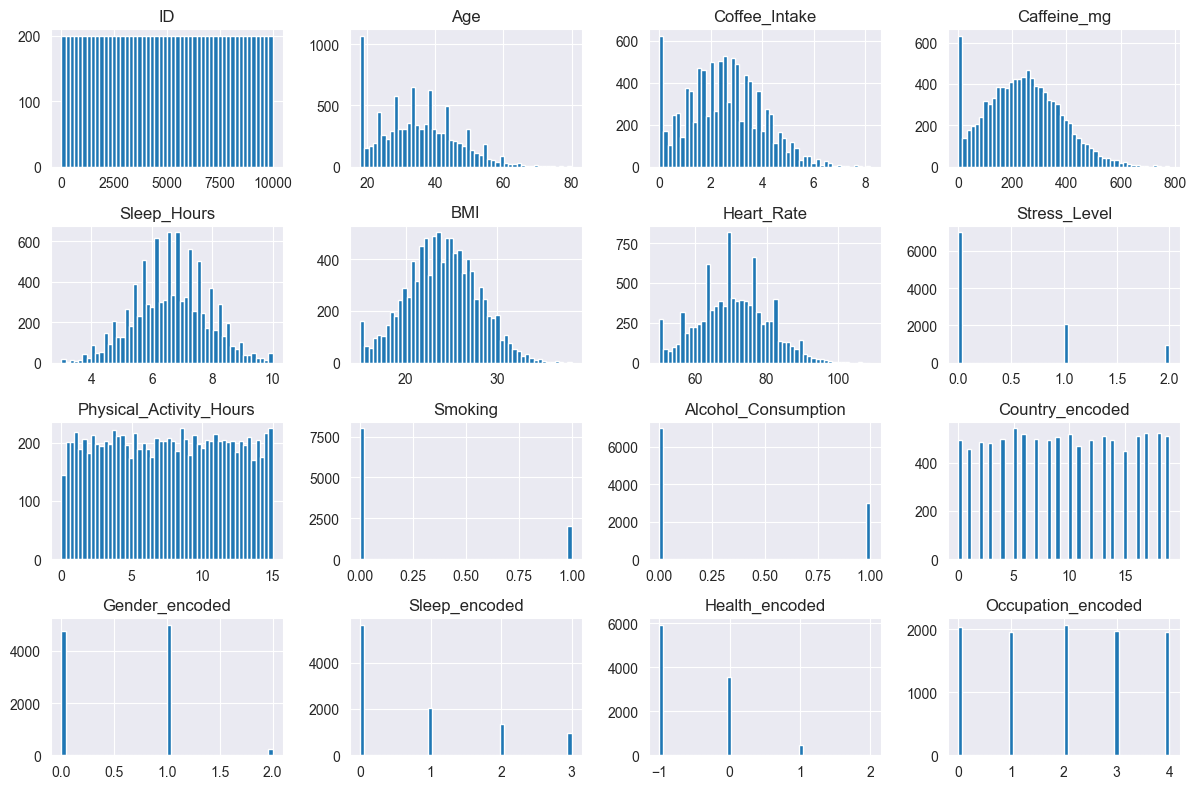

In [83]:
data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()

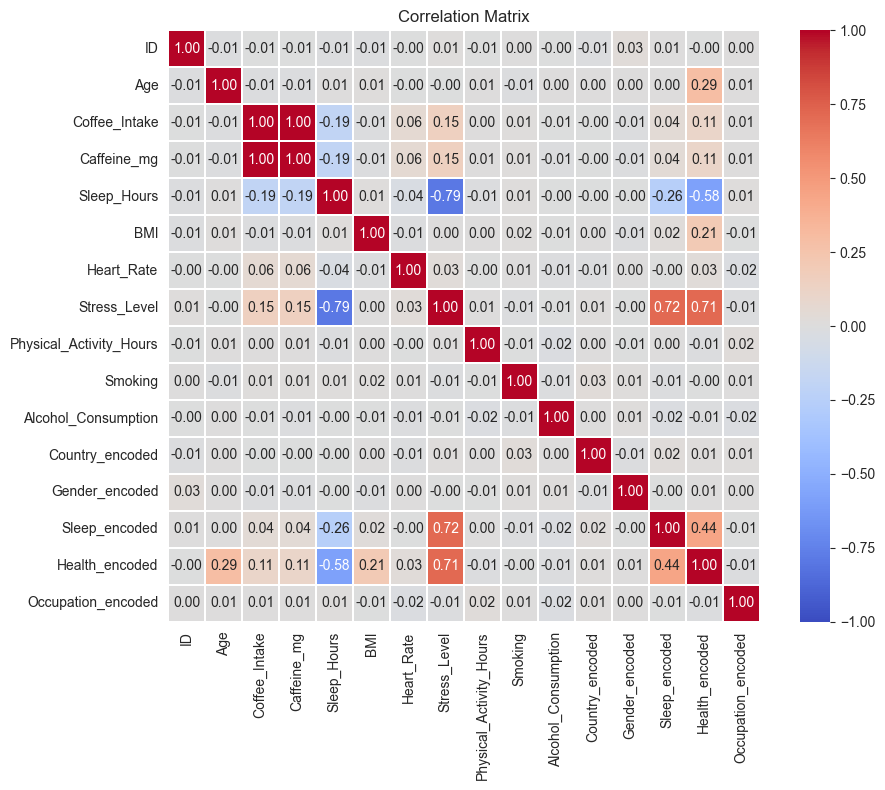

In [84]:
corr = data.corr(numeric_only=True)

# Show heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True, fmt=".2f",
            vmax=1.0, vmin=-1.0,
            linewidths=0.1,
            cmap="coolwarm",
            square=True, cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Based on the correlation matrix, we can drop the features "Occupation", "Gender", "Country", "Alcohol", "Smoking" and "Physical Activity", since they are fully uncorrelated with all the other other features except themselve.

Furthermore, "Coffee" seems to be equivalent to "Caffeine intake", no surprise, so we can drop one of them as well.

Note: Between "Country" and "Smoking" seems to be a slight correlation, but nothing note worthy.

Possible Targets: "Health", "Sleep", "Sleep Hours"

Accuracy: 0.998
Sensitivity (macro recall): 0.996

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1188
           0       1.00      1.00      1.00       716
           1       0.98      0.99      0.98        93
           2       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



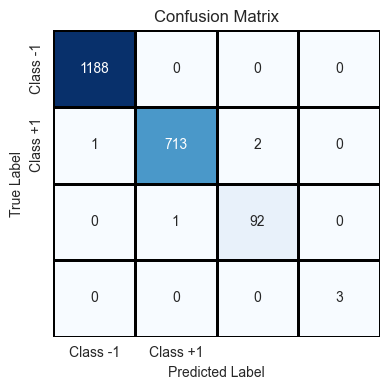

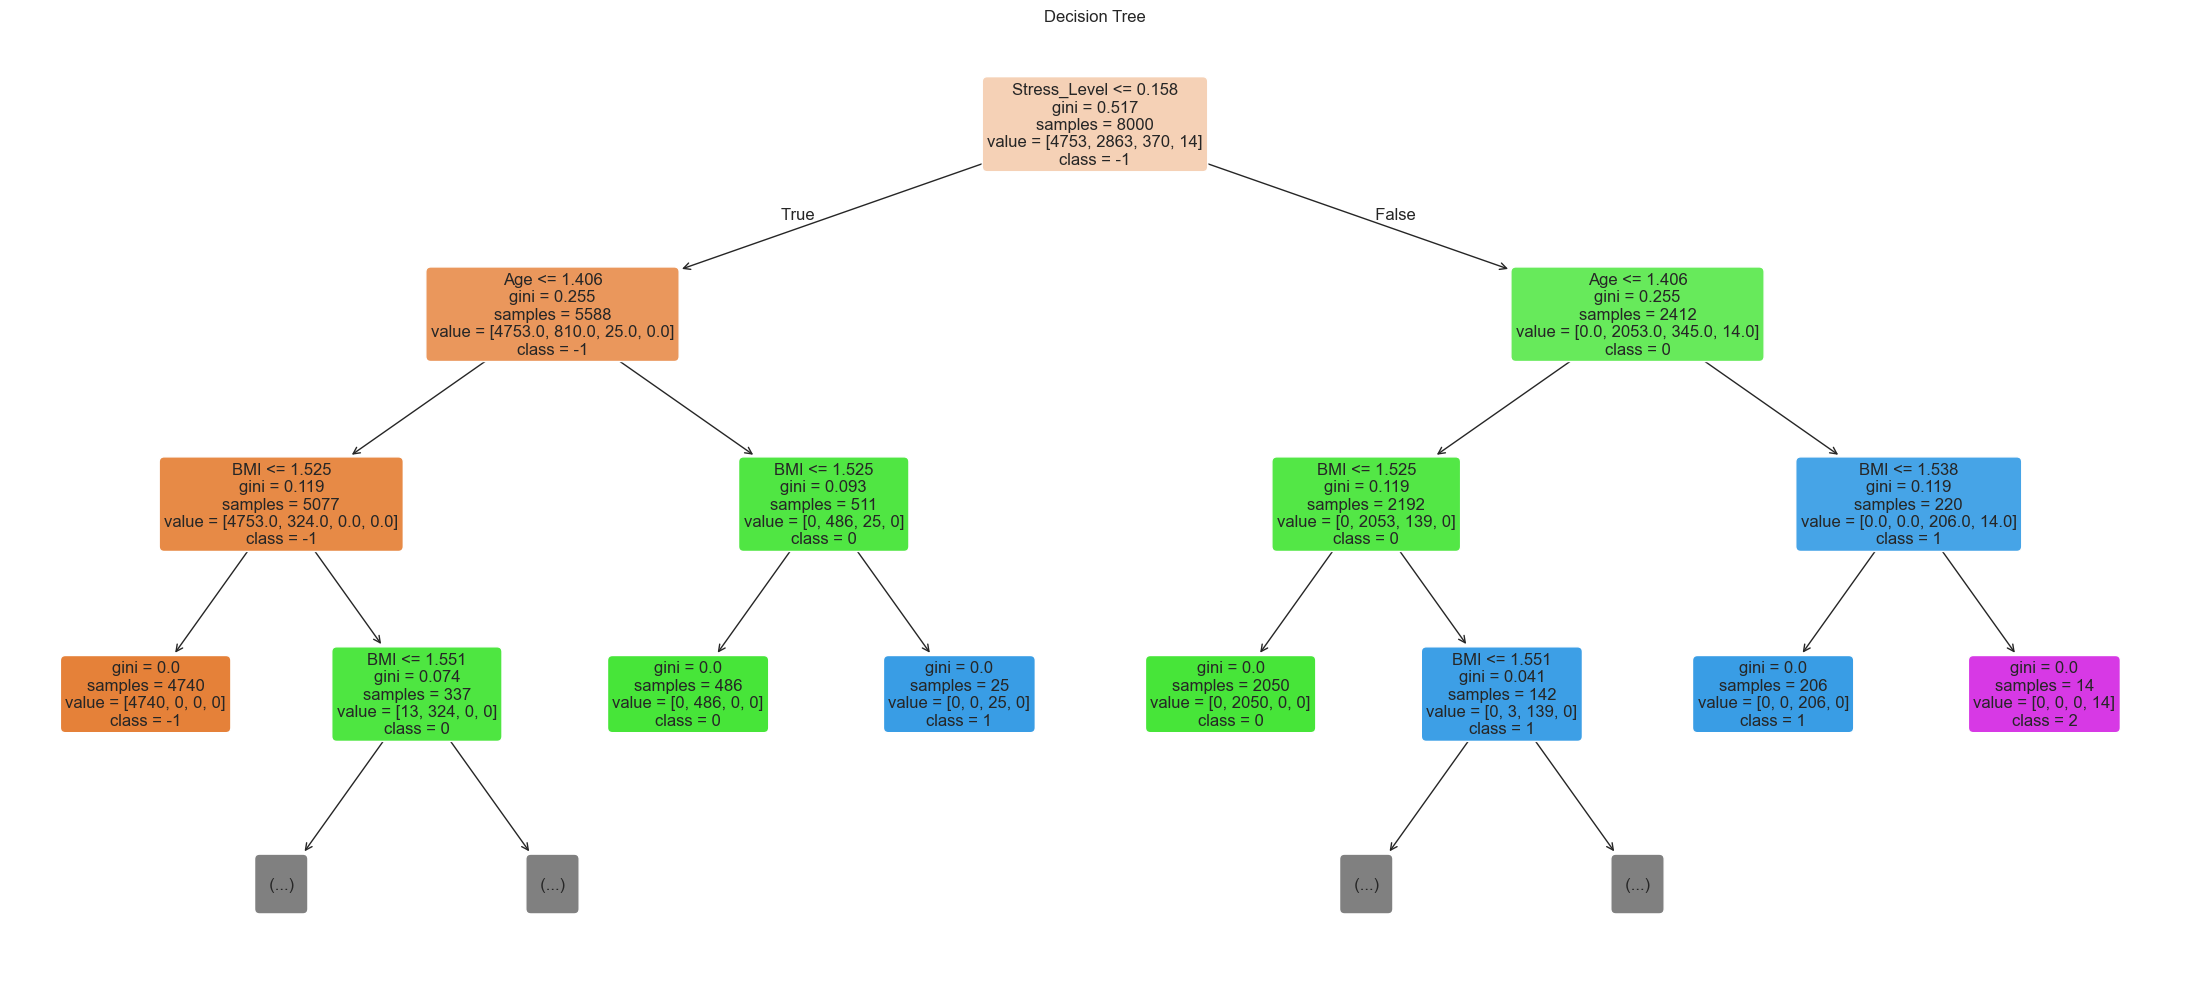

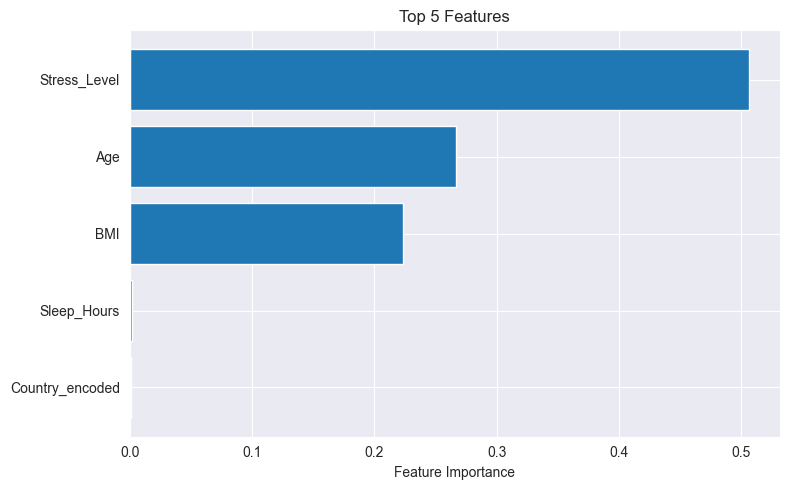

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# ============================================================
# 1. Split data and select numeric features
# ============================================================
train_df, val_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    stratify=data["Health_encoded"]
)

feature_names = train_df.select_dtypes(include=["number"]).drop(columns=["Health_encoded", "ID", "Coffee_Intake"]).columns
X_train = train_df[feature_names].values
y_train = train_df["Health_encoded"].values
X_val = val_df[feature_names].values
y_val = val_df["Health_encoded"].values

# ============================================================
# 2. Train pipeline (scaler + decision tree)
# ============================================================
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(
        criterion="gini",
        max_depth=7,
        random_state=42
    )),
])
pipeline.fit(X_train, y_train)

# ============================================================
# 3. Evaluate model
# ============================================================
y_pred = pipeline.predict(X_val)

print(f"Accuracy: {accuracy_score(y_val, y_pred):.3f}")
print(f"Sensitivity (macro recall): {recall_score(y_val, y_pred, average='macro'):.3f}\n")
print(classification_report(y_val, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
labels = ["Class -1", "Class +1"]

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# ============================================================
# 4. Plot decision tree (no back-scaling)
# ============================================================
tree_model = pipeline.named_steps["tree"]

plt.figure(figsize=(22, 10))
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=[str(c) for c in tree_model.classes_],
    filled=True,
    rounded=True,
    max_depth=3,           # adjust for readability
    fontsize=12,
    impurity=True
)
plt.title("Decision Tree")
plt.tight_layout()
plt.show()

# ============================================================
# 5. Feature importances
# ============================================================
importances = tree_model.feature_importances_
indices = importances.argsort()[::-1][:5]

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices][::-1], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices[::-1]])
plt.xlabel("Feature Importance")
plt.title("Top 5 Features")
plt.tight_layout()
plt.show()

Accuracy: 0.996


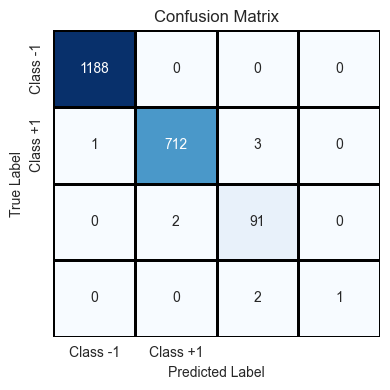

'\nindependent on the amount of estimators i have a problem with the last class that is underrepresented in the training and validation data\n'

In [86]:
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier)


r_for = Pipeline([
    ("scaler", StandardScaler()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42, class_weight='balanced'))])
#class weight= balanced helps with compensating for the unbalanced distribution of data

r_for.fit(X_train, y_train)
y_pred = r_for.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred):.3f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
labels = ["Class -1", "Class +1"]

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
"""
independent on the amount of estimators i have a problem with the last class that is underrepresented in the training and validation data
"""

In [87]:
print(X_train.shape)

(8000, 13)


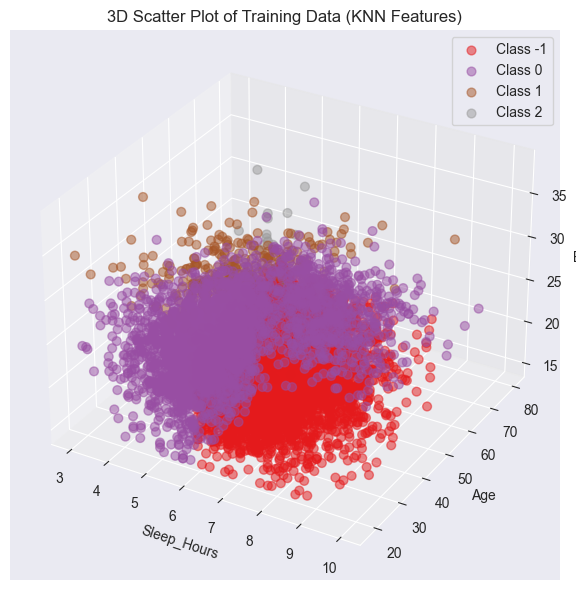

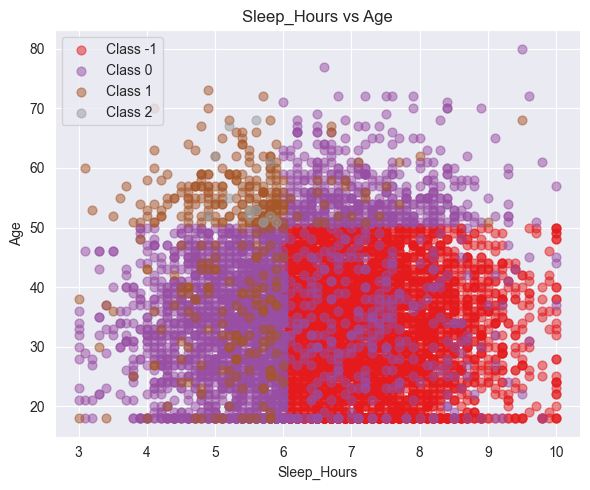

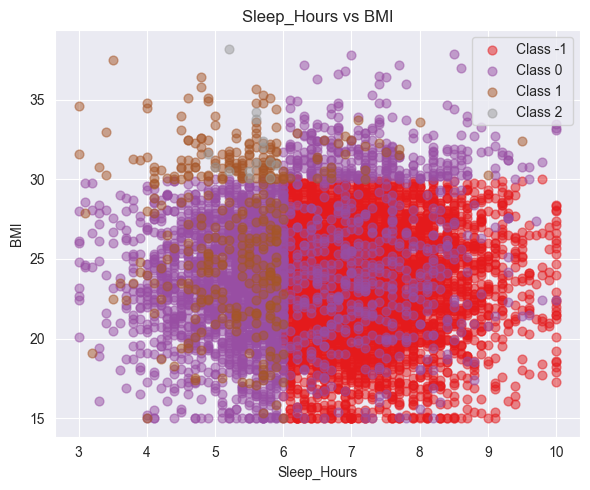

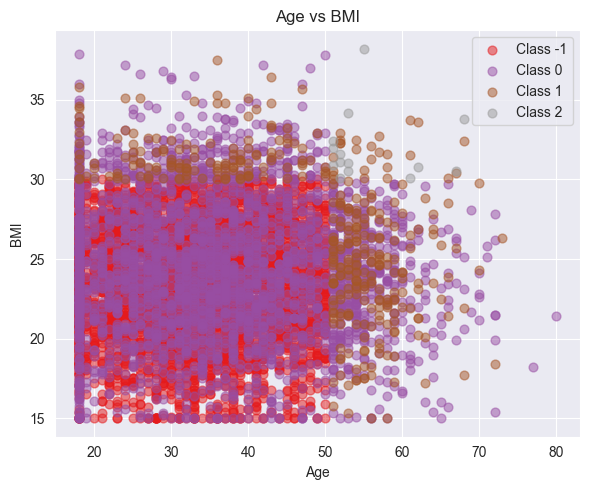

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# --------------------------
# FEATURE SELECTION
# --------------------------
train_knn = train_df.copy()
val_knn = val_df.copy()

# Select only the features you want for training
feature_names_knn = ["Sleep_Hours", "Age", "BMI"]

X_train_knn = train_knn[feature_names_knn].values
y_train_knn = train_knn["Health_encoded"].values

X_val_knn = val_knn[feature_names_knn].values
y_val_knn = val_knn["Health_encoded"].values

# --------------------------
# PIPELINE SETUP
# --------------------------
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        algorithm='auto',
        leaf_size=30,
        p=2,
        metric='minkowski',
        metric_params=None,
        n_jobs=None
    ))
])

# --------------------------
# TRAIN AND PREDICT
# --------------------------
# Example: knn_pipeline.fit(X_train_knn, y_train_knn)
# y_pred_knn = knn_pipeline.predict(X_val_knn)

# --------------------------
# PLOT SETTINGS
# --------------------------
colors_knn = plt.cm.Set1(np.linspace(0, 1, len(np.unique(y_train_knn))))
alpha_value_knn = 0.5  # Reduced opacity

# --------------------------
# 3D SCATTER PLOT
# --------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for idx, label in enumerate(np.unique(y_train_knn)):
    mask = y_train_knn == label
    ax.scatter(
        X_train_knn[mask, 0],
        X_train_knn[mask, 1],
        X_train_knn[mask, 2],
        color=colors_knn[idx],
        label=f'Class {label}',
        s=40,
        alpha=alpha_value_knn
    )

ax.set_xlabel('Sleep_Hours')
ax.set_ylabel('Age')
ax.set_zlabel('BMI')
ax.set_title('3D Scatter Plot of Training Data (KNN Features)')
ax.legend()
plt.tight_layout()
plt.show()

# --------------------------
# 2D SCATTER PLOTS FOR EACH PAIR
# --------------------------
pairs_knn = [(0, 1), (0, 2), (1, 2)]  # index pairs for features

for i, (a, b) in enumerate(pairs_knn):
    plt.figure(figsize=(6, 5))
    for idx, label in enumerate(np.unique(y_train_knn)):
        mask = y_train_knn == label
        plt.scatter(
            X_train_knn[mask, a],
            X_train_knn[mask, b],
            color=colors_knn[idx],
            label=f'Class {label}',
            s=40,
            alpha=alpha_value_knn
        )
    plt.xlabel(feature_names_knn[a])
    plt.ylabel(feature_names_knn[b])
    plt.title(f'{feature_names_knn[a]} vs {feature_names_knn[b]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

Accuracy: 0.966
Sensitivity (macro recall): 0.842

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      1188
           0       0.95      0.96      0.96       716
           1       0.92      0.75      0.83        93
           2       1.00      0.67      0.80         3

    accuracy                           0.97      2000
   macro avg       0.96      0.84      0.89      2000
weighted avg       0.97      0.97      0.96      2000



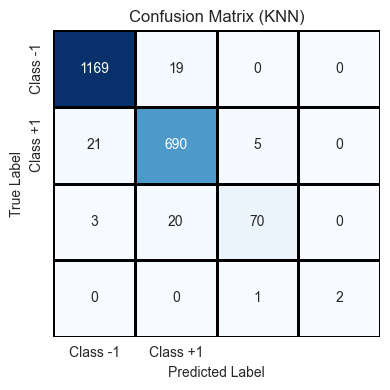

In [89]:
# --- TRAIN AND PREDICT ---
knn_pipeline.fit(X_train_knn, y_train_knn)
y_pred_knn = knn_pipeline.predict(X_val_knn)

# --- Print metrics ---
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
import seaborn as sns

print(f"Accuracy: {accuracy_score(y_val_knn, y_pred_knn):.3f}")
print(f"Sensitivity (macro recall): {recall_score(y_val_knn, y_pred_knn, average='macro'):.3f}\n")
print(classification_report(y_val_knn, y_pred_knn))

# --- Confusion Matrix ---
conf_matrix_knn = confusion_matrix(y_val_knn, y_pred_knn)
labels_knn = ["Class -1", "Class +1"]  # adjust to your actual class labels if needed

plt.figure(figsize=(4, 4))
sns.heatmap(
    conf_matrix_knn,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_knn,
    yticklabels=labels_knn,
    cbar=False,
    linewidths=1,
    linecolor="black"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (KNN)")
plt.tight_layout()
plt.show()

In [90]:
#logistic regression might be pretty okayish
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

"""
lr_clf = LogisticRegression(max_iter=50, random_state=42,
        penalty='l1',          # Regularization:# 'l1', 'l2', 'elasticnet', 'none'
        dual=False,           # Dual or primal formulation
        tol=1e-4,             # Tolerance for stopping criteria
        C=1.0,                # Inverse of regularization strength (smaller = stronger regularization)
        fit_intercept=True,  # Whether to include bias term
        intercept_scaling=1, # Used only for 'liblinear' when fit_intercept=True
        class_weight=None,   # 'balanced' or dict to handle imbalance
        solver='saga',      # Optimization algorithm: 'lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag'
        l1_ratio=None       # Only used if penalty='elasticnet'
    )



# Generate the confusion matrix
cm_lr  = confusion_matrix(y_test, y_pred_lr)   # Compute the confusion matrix for the Logistic Regression predictions

# Plot the confusion matrix with improved aesthetics
plt.figure(figsize=(10, 10))
sns.heatmap(cm_lr,
            annot=True, fmt='d', cmap='Oranges',
            linewidths=0.5,  # Add lines between cells
            linecolor='gray',  # Change the color of the lines
            cbar_kws={"shrink": 0.8},  # Adjust the color bar size
            annot_kws={"size": 14, "weight": "bold", "color": "black"})  # Customize annotation text

plt.xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=16, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.show()
"""

'\nlr_clf = LogisticRegression(max_iter=50, random_state=42,\n        penalty=\'l1\',          # Regularization:# \'l1\', \'l2\', \'elasticnet\', \'none\'\n        dual=False,           # Dual or primal formulation\n        tol=1e-4,             # Tolerance for stopping criteria\n        C=1.0,                # Inverse of regularization strength (smaller = stronger regularization)\n        fit_intercept=True,  # Whether to include bias term\n        intercept_scaling=1, # Used only for \'liblinear\' when fit_intercept=True\n        class_weight=None,   # \'balanced\' or dict to handle imbalance\n        solver=\'saga\',      # Optimization algorithm: \'lbfgs\', \'liblinear\', \'saga\', \'newton-cg\', \'sag\'\n        l1_ratio=None       # Only used if penalty=\'elasticnet\'\n    )\n\n\n\n# Generate the confusion matrix\ncm_lr  = confusion_matrix(y_test, y_pred_lr)   # Compute the confusion matrix for the Logistic Regression predictions\n\n# Plot the confusion matrix with improved aesth

In [91]:
already_converted = False

In [92]:
"""so jetzt wird mit Kanonen auf Spatzen geschossen
Englisch: Now we shoot at sparrows with cannons

we train a mutilayer perceptron
"""
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
# Keep original copies
X_train_origin = X_train.copy()
X_test_origin  = X_val.copy()

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train = scaler.fit_transform(X_train_origin)
X_val  = scaler.transform(X_test_origin)


try:
    already_converted
except NameError:
    already_converted = False
print(already_converted)

if not already_converted:
    y_train = to_categorical(y_train, 10)
    y_test  = to_categorical(y_val, 10)
    already_converted = True


False


In [93]:
"""builds multilayer perceptron we use default density like in the clothing example. Like there we also use relu as activiation function for layer 1 and 2
We have to change input shape though from 784 to 14 """
mlp_model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(13,)),  # Hidden layer 1
    layers.Dense(128, activation='relu'),                      # Hidden layer 2
    layers.Dense(10 , activation='softmax')                    # Output layer (10 classes)
])

mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use this for integer labels
    metrics=['accuracy']
)


/Users/paulzelaskowski/PycharmProjects/Umea_introduction/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
train_history = mlp_model.fit(
    X_train, y_train,
    epochs=20,          # Number of epochs to train the model
    batch_size=128,     # Number of samples per gradient update
    validation_data=(X_val, y_test) )

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8176 - loss: 0.7003 - val_accuracy: 0.8820 - val_loss: 0.3035
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2498 - val_accuracy: 0.9275 - val_loss: 0.2123
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 0.1776 - val_accuracy: 0.9470 - val_loss: 0.1583
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9560 - loss: 0.1312 - val_accuracy: 0.9585 - val_loss: 0.1240
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.1031 - val_accuracy: 0.9600 - val_loss: 0.1077
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9721 - loss: 0.0864 - val_accuracy: 0.9655 - val_loss: 0.0978
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9745 - loss: 0.0761 - val_accuracy: 0.9685 - val_loss: 0.0897
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9794 - loss: 0.0650 - val_accuracy: 0.9715 - val_loss:

In [95]:
test_loss, test_acc = mlp_model.evaluate(X_val, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9785 - loss: 0.0425
Test loss: 0.0425
Test accuracy: 0.9785


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


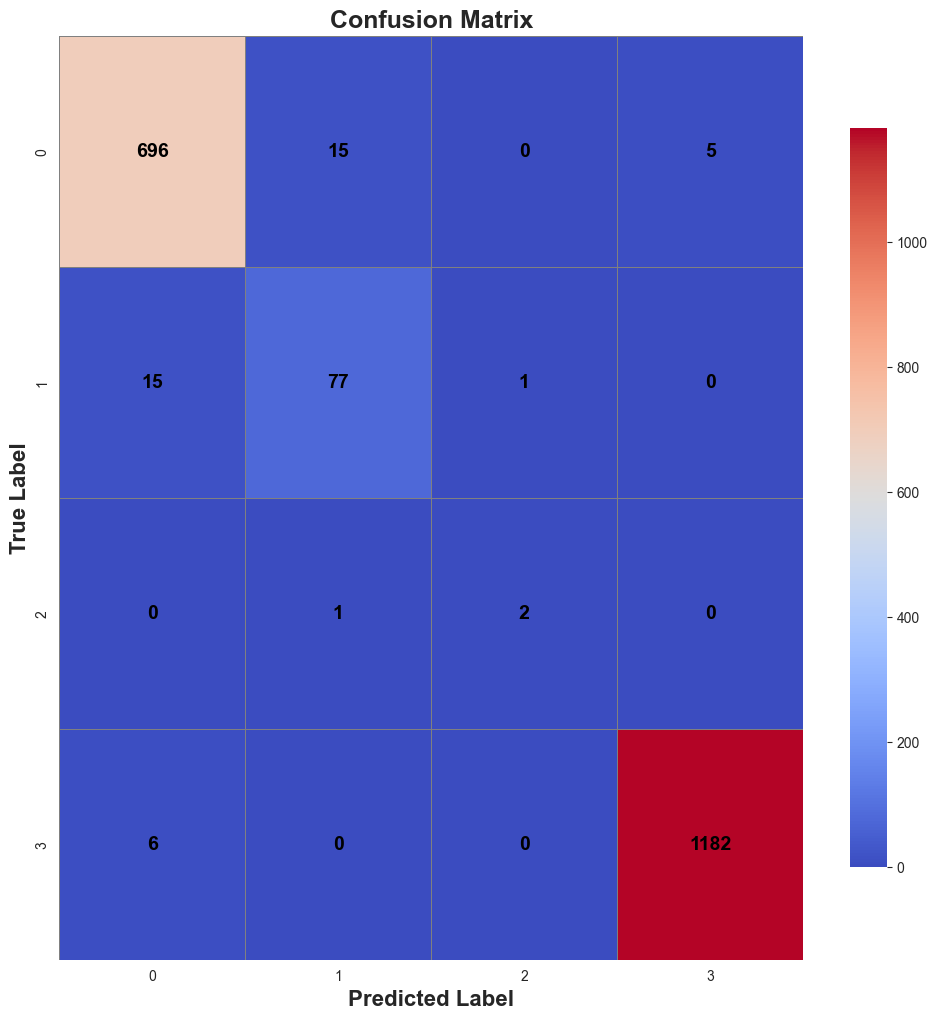

In [103]:
# Get predictions (class indices)
y_pred_probs = mlp_model.predict(X_val)
y_pred_mlp   = np.argmax(y_pred_probs, axis=1)     # convert from one-hot probabilities → class labels

# Get true labels
# If your y_test is one-hot encoded:
if y_test.ndim == 2 and y_test.shape[1] == 10:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test


cm_mlp = confusion_matrix(y_true, y_pred_mlp)

plt.figure(figsize=(12, 12))
#colormaps viridis, plasma, coolwarm, magma, Reds
sns.heatmap(cm_mlp,
            annot=True, fmt='d', cmap='coolwarm',
            linewidths=0.5,  # Add lines between cells
            linecolor='gray',  # Change the color of the lines
            cbar_kws={"shrink": 0.8},  # Adjust the color bar size
            annot_kws={"size": 14, "weight": "bold", "color": "black"})  # Customize annotation text

plt.xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=16, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.show()